In [1]:
import keras
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.utils import to_categorical



Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline  

# 1. Let's import some data

https://www.kaggle.com/c/titanic/data

In [3]:
train_dataset=pd.DataFrame()
train_dataset=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AOMDeepLearningWorkshop/master/titanictrain.csv')

In [4]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### We want to predict Survived, using the following features: PClass, Sex, Age, SibSp, Parch, Fare, Embarked

### We have to transform features Sex and Embarked (a.k.a label encoding) 

In [5]:
train_dataset = train_dataset.replace(["male", "female"], [0,1])
train_dataset = train_dataset.replace(["S", "C", "Q"], [0,1,2])
train_dataset= train_dataset.fillna(0)


In [6]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0.0
5,6,0,3,"Moran, Mr. James",0,0.0,0,0,330877,8.4583,0,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,1.0


In [7]:
target = train_dataset[["Survived"]]
features = train_dataset[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [8]:
#convert to numpy array for NN
features = features.values
target = target.values

In [9]:
#target = to_categorical(train_dataset['Survived'])

In [10]:
target[0:10]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [11]:
features[0:10]

array([[  3.    ,   0.    ,  22.    ,   1.    ,   0.    ,   7.25  ,   0.    ],
       [  1.    ,   1.    ,  38.    ,   1.    ,   0.    ,  71.2833,   1.    ],
       [  3.    ,   1.    ,  26.    ,   0.    ,   0.    ,   7.925 ,   0.    ],
       [  1.    ,   1.    ,  35.    ,   1.    ,   0.    ,  53.1   ,   0.    ],
       [  3.    ,   0.    ,  35.    ,   0.    ,   0.    ,   8.05  ,   0.    ],
       [  3.    ,   0.    ,   0.    ,   0.    ,   0.    ,   8.4583,   2.    ],
       [  1.    ,   0.    ,  54.    ,   0.    ,   0.    ,  51.8625,   0.    ],
       [  3.    ,   0.    ,   2.    ,   3.    ,   1.    ,  21.075 ,   0.    ],
       [  3.    ,   1.    ,  27.    ,   0.    ,   2.    ,  11.1333,   0.    ],
       [  2.    ,   1.    ,  14.    ,   1.    ,   0.    ,  30.0708,   1.    ]])

In [12]:
# we will only use the following features: PClass, Age, SibSp,Parch, Fare
#predictors=train_dataset[['Pclass','Sex','Age','SibSp','Parch','Fare']].values


In [13]:
#predictors

In [14]:
numberofcolumns=features.shape[1]
numberofcolumns

7

## 2. Let's understand the data

In [15]:
correlation_matrix=train_dataset.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.038125,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,0.010539,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.361353,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.024978,0.114631,0.245489,0.182333,0.116569
Age,0.038125,0.010539,-0.361353,-0.024978,1.000000,-0.184664,-0.048786,0.135516,-0.209388
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.184664,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.048786,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.135516,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.209388,-0.059961,-0.078665,0.062142,1.000000


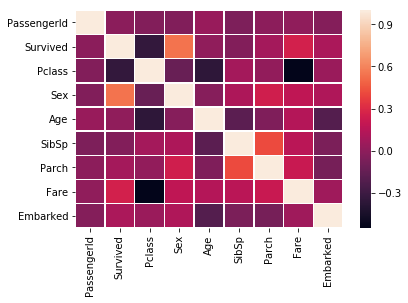

In [16]:
ax = sns.heatmap(correlation_matrix,linewidths=.5)

# 3. Specify the architecture of the model (very basic one)

In [17]:
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(100,activation='relu',input_shape=(numberofcolumns,)))

# Add a second layer
model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(1,activation='sigmoid'))



# 4. Let's compile the model

In [18]:
# Compile the model. Add accuracy as the metric to benchmark our model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# 5. Let's fit the model

In [19]:
# Fit the model. This time we keep 20% of our samples for test purposes
model_training=model.fit(features,target,verbose=2,epochs=100,validation_split=0.1)


Train on 801 samples, validate on 90 samples
Epoch 1/100
 - 0s - loss: 0.8969 - acc: 0.5830 - val_loss: 0.5313 - val_acc: 0.7667
Epoch 2/100
 - 0s - loss: 0.6581 - acc: 0.6604 - val_loss: 0.6410 - val_acc: 0.6222
Epoch 3/100
 - 0s - loss: 0.6376 - acc: 0.6629 - val_loss: 0.5891 - val_acc: 0.7111
Epoch 4/100
 - 0s - loss: 0.6418 - acc: 0.6779 - val_loss: 0.5370 - val_acc: 0.6889
Epoch 5/100
 - 0s - loss: 0.5961 - acc: 0.6929 - val_loss: 0.4976 - val_acc: 0.7778
Epoch 6/100
 - 0s - loss: 0.5745 - acc: 0.6991 - val_loss: 0.5186 - val_acc: 0.7556
Epoch 7/100
 - 0s - loss: 0.5632 - acc: 0.7291 - val_loss: 0.5242 - val_acc: 0.7222
Epoch 8/100
 - 0s - loss: 0.5886 - acc: 0.7179 - val_loss: 0.4642 - val_acc: 0.7444
Epoch 9/100
 - 0s - loss: 0.6232 - acc: 0.7328 - val_loss: 0.4693 - val_acc: 0.7667
Epoch 10/100
 - 0s - loss: 0.6153 - acc: 0.7366 - val_loss: 0.5827 - val_acc: 0.6556
Epoch 11/100
 - 0s - loss: 0.5318 - acc: 0.7503 - val_loss: 0.5105 - val_acc: 0.8000
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 1.2343 - acc: 0.6891 - val_loss: 0.5648 - val_acc: 0.7444
Epoch 98/100
 - 0s - loss: 0.5428 - acc: 0.7753 - val_loss: 0.4275 - val_acc: 0.8111
Epoch 99/100
 - 0s - loss: 0.4657 - acc: 0.7965 - val_loss: 0.3962 - val_acc: 0.8111
Epoch 100/100
 - 0s - loss: 0.4598 - acc: 0.7903 - val_loss: 0.4043 - val_acc: 0.8222


# 6. Let's evaluate our model

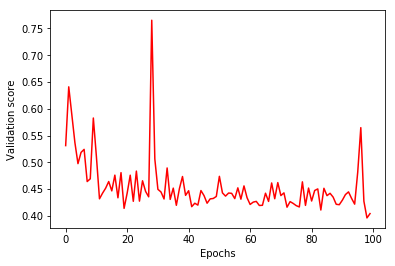

In [20]:
# Create the plot
pyplot.plot(model_training.history['val_loss'], 'r')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation score')
pyplot.show()

# 7. Let's improve our model

In [21]:
# Set up the model
#model2 = Sequential()
# Add the first layer
#model2.add(Dense(100,activation='relu',input_shape=(numberofcolumns,)))
# Add a second layer


#model2.add(Dense(100, activation='relu'))
#model2.add(Dense(10, activation='relu'))

# Add the output layer
#model2.add(Dense(1,activation='sigmoid'))

In [22]:
model2 = Sequential()
#input layer
model2.add(Dense(100, input_shape=(numberofcolumns,)))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(0.4))

# hidden layers
model2.add(Dense(50))
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.add(Dropout(0.4))
    
model2.add(Dense(10))
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.add(Dropout(0.4))
    
#model2.add(Dense(2, activation="sigmoid"))
    
# output layer
model2.add(Dense(1, activation='sigmoid'))

In [23]:
# Compile the model. Add accuracy as the metric to benchmark our model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [24]:
#Fit the model. This time we keep 20% of our samples for test purposes
model2_training=model2.fit(features,target,verbose=2,epochs=100,validation_split=0.1)

Train on 801 samples, validate on 90 samples
Epoch 1/100
 - 0s - loss: 0.8087 - acc: 0.4082 - val_loss: 0.7234 - val_acc: 0.3778
Epoch 2/100
 - 0s - loss: 0.7509 - acc: 0.4919 - val_loss: 0.6779 - val_acc: 0.5111
Epoch 3/100
 - 0s - loss: 0.7273 - acc: 0.5031 - val_loss: 0.6522 - val_acc: 0.7222
Epoch 4/100
 - 0s - loss: 0.6984 - acc: 0.5431 - val_loss: 0.6372 - val_acc: 0.6889
Epoch 5/100
 - 0s - loss: 0.6745 - acc: 0.5955 - val_loss: 0.6236 - val_acc: 0.7222
Epoch 6/100
 - 0s - loss: 0.6630 - acc: 0.6130 - val_loss: 0.6140 - val_acc: 0.7000
Epoch 7/100
 - 0s - loss: 0.6534 - acc: 0.5980 - val_loss: 0.6046 - val_acc: 0.6778
Epoch 8/100
 - 0s - loss: 0.6446 - acc: 0.6467 - val_loss: 0.5973 - val_acc: 0.7222
Epoch 9/100
 - 0s - loss: 0.6339 - acc: 0.6242 - val_loss: 0.5881 - val_acc: 0.7333
Epoch 10/100
 - 0s - loss: 0.6297 - acc: 0.6567 - val_loss: 0.5805 - val_acc: 0.7444
Epoch 11/100
 - 0s - loss: 0.6211 - acc: 0.6604 - val_loss: 0.5733 - val_acc: 0.7556
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.4873 - acc: 0.7865 - val_loss: 0.4122 - val_acc: 0.8333
Epoch 98/100
 - 0s - loss: 0.4808 - acc: 0.7978 - val_loss: 0.3968 - val_acc: 0.8111
Epoch 99/100
 - 0s - loss: 0.5071 - acc: 0.7953 - val_loss: 0.3991 - val_acc: 0.8222
Epoch 100/100
 - 0s - loss: 0.4977 - acc: 0.7790 - val_loss: 0.4041 - val_acc: 0.8111


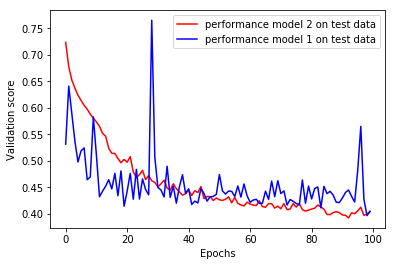

In [25]:
# Create the plot
pyplot.plot(model2_training.history['val_loss'], 'r',label='performance model 2 on test data')
pyplot.plot(model_training.history['val_loss'], 'b',label='performance model 1 on test data')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation score')
pyplot.legend()
pyplot.show()

## Model 2 seems to be performing better in the long run

## How is model 2 performing ?

In [26]:
train_dataset['Predicted']=pd.DataFrame(model2.predict(features))
# we transform probabilities into discrete outcomes (0/1)
train_dataset['Predicted_Discrete']=round(train_dataset['Predicted'])

In [27]:
# Create confusion matrix


confusion_matrix=pd.crosstab(train_dataset['Survived'], train_dataset['Predicted_Discrete'], rownames=['Actual Types'], colnames=['Predicted Types'])
confusion_matrix

Predicted Types,0.0,1.0
Actual Types,,
0,506,43
1,112,230


### We observe that model 2 is relatively good at predicting who will perish.
### Moreover model 2 achieves 83% of accuracy (is it good enough ?)

### However model 2 predicted many survivors which did not survive in practice (62). 
### Model 2 predicted many fatalities which did survive in practice (98). 

#### This gives us some hints for further improvement. Manual Analysis of misclassifications to understand the causes.


In [28]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted,Predicted_Discrete
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0.0,0.127931,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,0.810513,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0,0.535150,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,0.809539,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0.0,0.117135,0.0
5,6,0,3,"Moran, Mr. James",0,0.0,0,0,330877,8.4583,0,2.0,0.140352,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0,0.191697,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0.0,0.152771,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0.0,0.483307,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,1.0,0.786251,1.0
